<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "/content/EastWestAirlines.xlsx" dataset using K-Means, Hierarchical, and DBSCAN clustering algorithms. Preprocess the data, perform EDA, implement each algorithm, analyze and visualize the resulting clusters, and evaluate their performance using appropriate metrics.

## Load the dataset

### Subtask:
Load the data from the "/content/EastWestAirlines.xlsx" file into a pandas DataFrame.


**Reasoning**:
Load the data from the Excel file into a pandas DataFrame and display its basic information.



In [1]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel("/content/EastWestAirlines.xlsx")

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

# Display the number of rows and columns in the DataFrame
display(df.shape)

East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


None

(26, 5)

**Reasoning**:
The data was not loaded correctly as the header information is included in the DataFrame. I need to reload the data by skipping the initial rows that contain the metadata. Based on the `df.head()` output, it seems like the actual header starts from row 9 (index 8).



In [2]:
# Read the Excel file into a pandas DataFrame, skipping the initial rows
df = pd.read_excel("/content/EastWestAirlines.xlsx", skiprows=8)

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

# Display the number of rows and columns in the DataFrame
display(df.shape)

Unnamed: 0 Unnamed: 1       Unnamed: 2                         Unnamed: 3  \
0  Field Name  Data Type  Max Data Length  Raw Data or Telcom Created Field?   
1         ID#     NUMBER              NaN                             Telcom   
2     Balance     NUMBER                8                                Raw   
3  Qual_miles     NUMBER                8                                Raw   
4   cc1_miles       CHAR                1                                Raw   

                                          Unnamed: 4  
0                                        Description  
1                                          Unique ID  
2          Number of miles eligible for award travel  
3  Number of miles counted as qualifying for Topf...  
4  Number of miles earned with freq. flyer credit...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     object
 1   Unnamed: 1  13 non-null     object
 2   Unnamed: 2  6 non-null      object
 3   Unnamed: 3  13 non-null     object
 4   Unnamed: 4  18 non-null     object
dtypes: object(5)
memory usage: 852.0+ bytes


None

(18, 5)

**Reasoning**:
The previous attempt to load the data still resulted in the metadata being included as the header. The correct data seems to start after the row containing "Description". I need to reload the data again, this time skipping the initial rows up to and including the row with "Description". Based on the output, the actual data seems to start after row 1 (index 0) of the currently loaded dataframe, which was row 9 in the original file. Therefore, I should skip 9 rows in the original file.



In [3]:
# Read the Excel file into a pandas DataFrame, skipping the initial rows containing metadata
df = pd.read_excel("/content/EastWestAirlines.xlsx", skiprows=9)

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

# Display the number of rows and columns in the DataFrame
display(df.shape)

Field Name Data Type  Max Data Length Raw Data or Telcom Created Field?  \
0         ID#    NUMBER              NaN                            Telcom   
1     Balance    NUMBER              8.0                               Raw   
2  Qual_miles    NUMBER              8.0                               Raw   
3   cc1_miles      CHAR              1.0                               Raw   
4   cc2_miles      CHAR              1.0                               Raw   

                                         Description  
0                                          Unique ID  
1          Number of miles eligible for award travel  
2  Number of miles counted as qualifying for Topf...  
3  Number of miles earned with freq. flyer credit...  
4  Number of miles earned with Rewards credit car...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field Name                         13 non-null     object 
 1   Data Type                          12 non-null     object 
 2   Max Data Length                    5 non-null      float64
 3   Raw Data or Telcom Created Field?  12 non-null     object 
 4   Description                        17 non-null     object 
dtypes: float64(1), object(4)
memory usage: 812.0+ bytes


None

(17, 5)

**Reasoning**:
The DataFrame still contains metadata about the columns instead of the actual customer data. The description in the original file indicates that the actual data is in a separate sheet. I need to load the data from the sheet named "Data".



In [22]:
# Read the Excel file into a pandas DataFrame from the sheet named "Data"
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

# Display the number of rows and columns in the DataFrame
display(df.shape)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

(3999, 12)

**Reasoning**:
The previous attempt to load data from the sheet named "Data" failed because the sheet was not found. I need to list the available sheet names in the Excel file to identify the correct sheet containing the data.



In [5]:
# List the available sheet names in the Excel file
excel_file = pd.ExcelFile("/content/EastWestAirlines.xlsx")
print(excel_file.sheet_names)

['Description', 'data']


**Reasoning**:
The sheet names are 'Description' and 'data'. The actual data is likely in the sheet named 'data'. I will load the data from this sheet.



In [6]:
# Read the Excel file into a pandas DataFrame from the sheet named "data"
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name="data")

# Display the first 5 rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

# Display the number of rows and columns in the DataFrame
display(df.shape)

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


None

(3999, 12)

## Data preprocessing

### Subtask:
Handle missing values, remove outliers, and scale the features.


**Reasoning**:
Check for missing values and display the results.



In [7]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


**Reasoning**:
There are no missing values, so proceed to handle outliers using the IQR method for numerical columns. The ID# column is an identifier and not a feature for clustering, so it will be excluded from outlier detection and scaling.



In [8]:
import numpy as np

# Select numerical columns excluding 'ID#' for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('ID#')

# Handle outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers handled using IQR.")

Outliers handled using IQR.


**Reasoning**:
Scale the numerical features (excluding 'ID#') using StandardScaler.



In [9]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns excluding 'ID#' for scaling
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('ID#')

# Scale the numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical features scaled using StandardScaler.")
display(df.head())

Numerical features scaled using StandardScaler.


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    2 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    3 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    4 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4    5  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918

## Exploratory data analysis (eda)

### Subtask:
Perform EDA to understand the data distribution and identify potential patterns. Use visualizations to explore hidden patterns.


**Reasoning**:
Generate descriptive statistics, create a correlation matrix heatmap, and generate histograms for the DataFrame to understand the data distribution and relationships.



Descriptive Statistics:


ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  3999.000000  3.999000e+03      3999.0  3.999000e+03     3999.0   
mean   2014.819455 -5.685763e-17         0.0  1.705729e-16        0.0   
std    1160.764358  1.000125e+00         0.0  1.000125e+00        0.0   
min       1.000000 -1.086971e+00         0.0 -7.695784e-01        0.0   
25%    1010.500000 -7.711597e-01         0.0 -7.695784e-01        0.0   
50%    2016.000000 -3.523592e-01         0.0 -7.695784e-01        0.0   
75%    3020.500000  4.881053e-01         0.0  6.831212e-01        0.0   
max    4021.000000  2.377003e+00         0.0  2.135821e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     3999.0  3.999000e+03  3.999000e+03       3.999000e+03   
mean         0.0 -2.842882e-17  2.842882e-17      -7.107204e-18   
std          0.0  1.000125e+00  1.000125e+00       1.000125e+00   
min          0.0 -8.527184e-01 -1.258576e+00      -6.043135e-01   
25%          0.0 -7.835524e-01 -9.294109e-01      -6.043135e-01   
50%          0.0 -4.559271e-01  5.808475e-02      -6.043135e-01   
75%          0.0  4.642292e-01  6.066935e-01       4.512077e-01   
max          0.0  2.335902e+00  2.910850e+00       2.034489e+00   

       Flight_trans_12  Days_since_enroll        Award?  
count     3.999000e+03       3.999000e+03  3.999000e+03  
mean      4.264322e-17       5.685763e-17  1.421441e-17  
std       1.000125e+00       1.000125e+00  1.000125e+00  
min      -6.261434e-01      -1.993611e+00 -7.669193e-01  
25%      -6.261434e-01      -8.661823e-01 -7.669193e-01  
50%      -6.261434e-01      -1.092530e-02 -7.669193e-01  
75%       4.323844e-01       8.097050e-01  1.303918e+00  
max       2.020176e+00       2.023095e+00  1.303918e+00

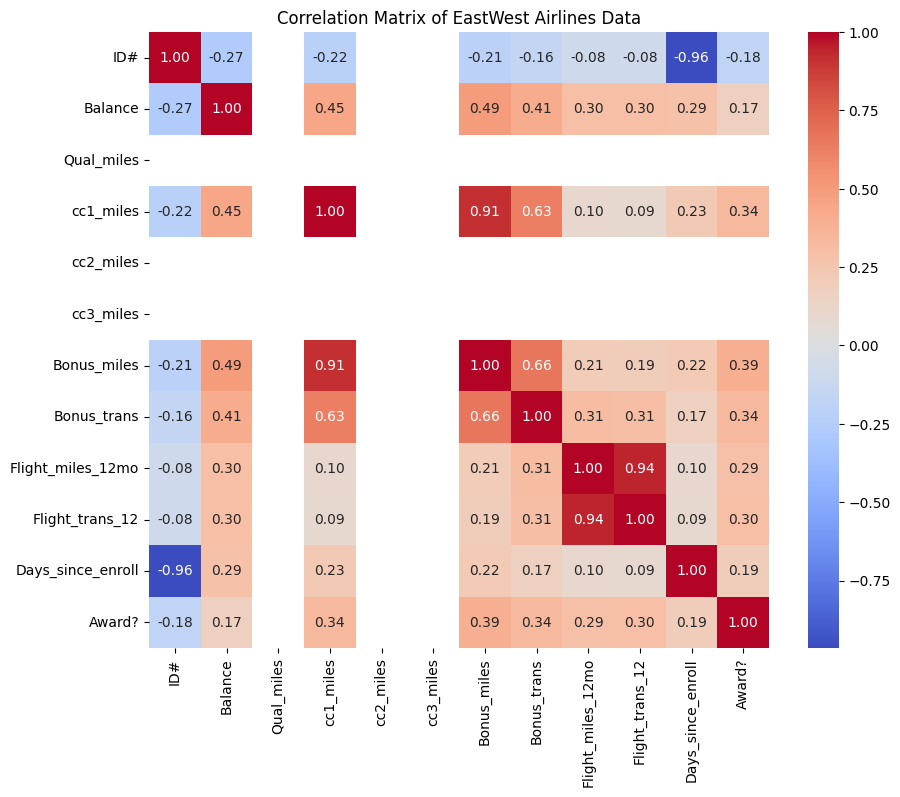

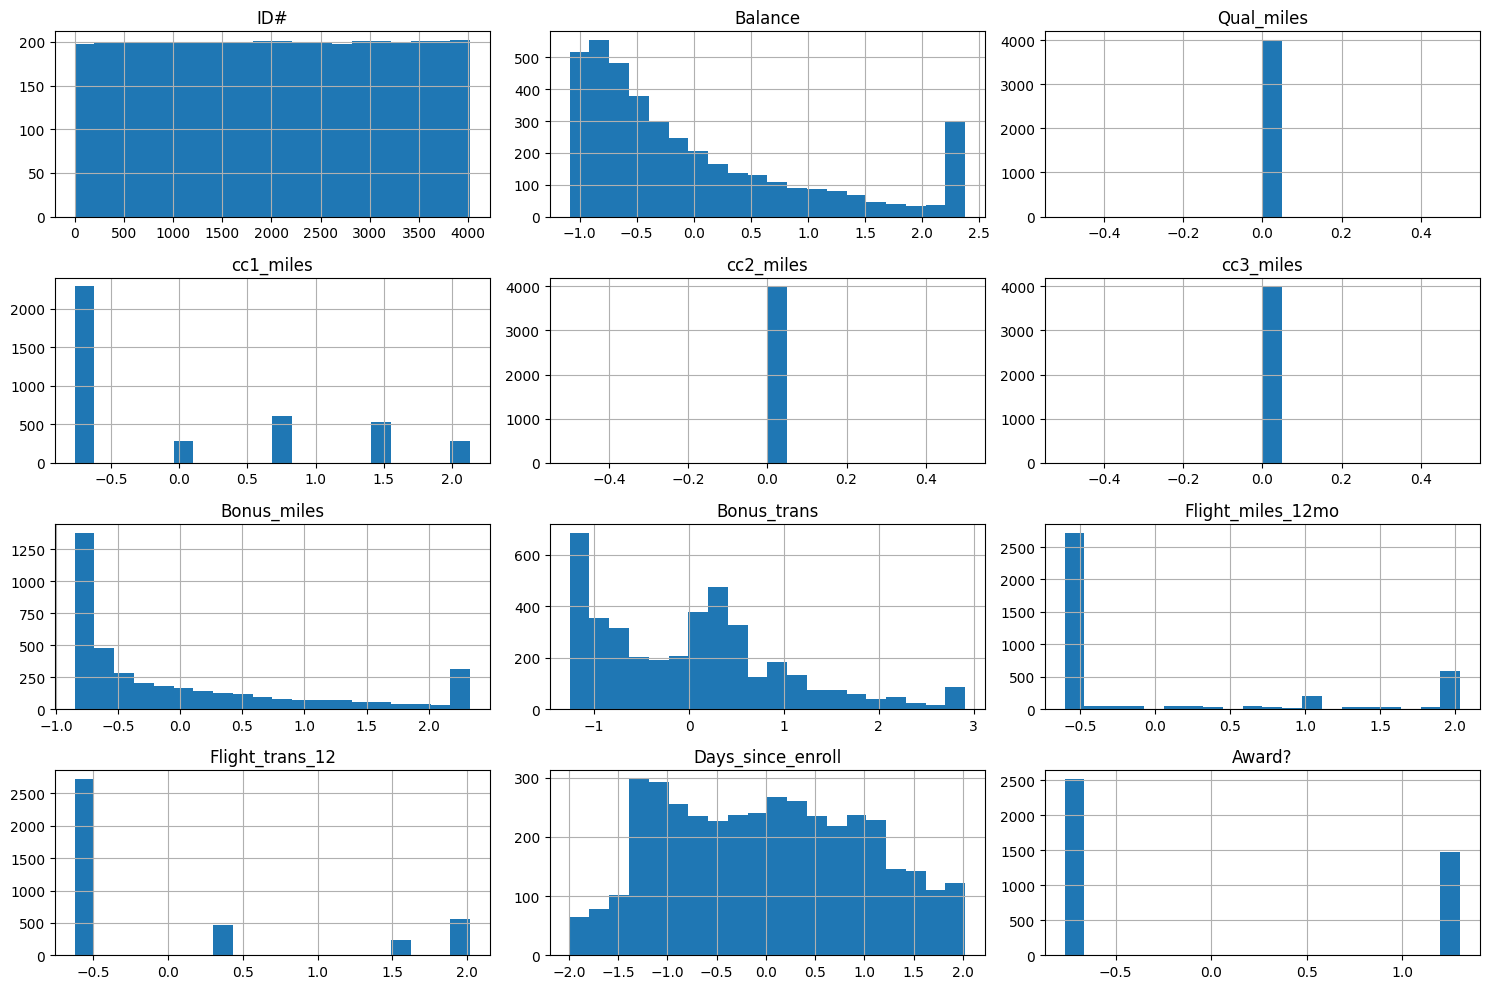

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Generate descriptive statistics
print("Descriptive Statistics:")
display(df.describe())

# 2. Create a correlation matrix and visualize as a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of EastWest Airlines Data')
plt.show()

# 3. Generate histograms for each numerical column
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

**Reasoning**:
Create scatter plots for pairs of potentially related features to explore relationships between them.



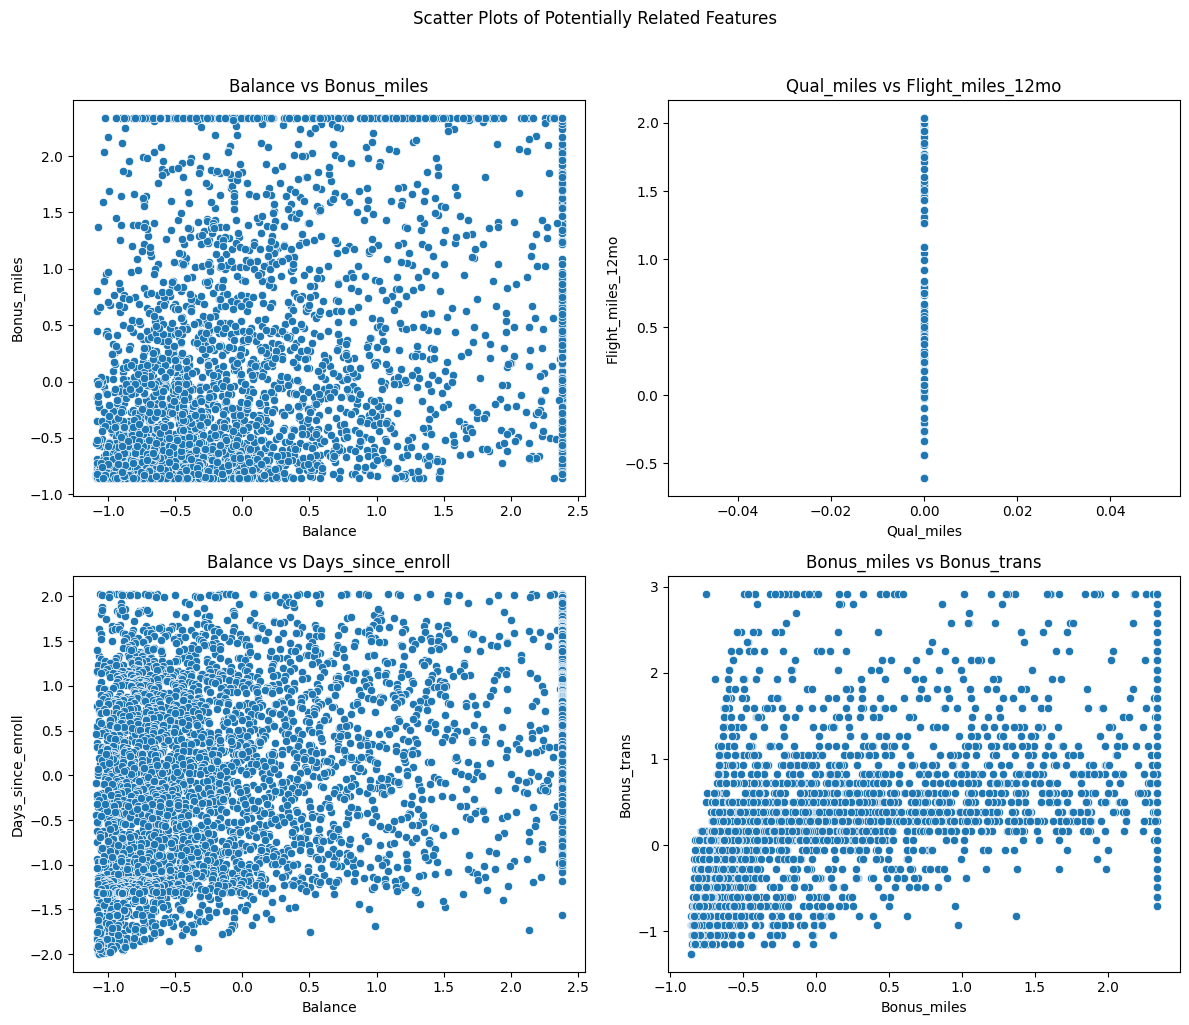

In [11]:
# 4. Create scatter plots for pairs of potentially related features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Scatter Plots of Potentially Related Features', y=1.02)

sns.scatterplot(ax=axes[0, 0], x='Balance', y='Bonus_miles', data=df)
axes[0, 0].set_title('Balance vs Bonus_miles')

sns.scatterplot(ax=axes[0, 1], x='Qual_miles', y='Flight_miles_12mo', data=df)
axes[0, 1].set_title('Qual_miles vs Flight_miles_12mo')

sns.scatterplot(ax=axes[1, 0], x='Balance', y='Days_since_enroll', data=df)
axes[1, 0].set_title('Balance vs Days_since_enroll')

sns.scatterplot(ax=axes[1, 1], x='Bonus_miles', y='Bonus_trans', data=df)
axes[1, 1].set_title('Bonus_miles vs Bonus_trans')

plt.tight_layout()
plt.show()

## Implement k-means clustering

### Subtask:
Apply the K-Means algorithm, determine the optimal number of clusters using the Elbow method, and evaluate using the silhouette score.


**Reasoning**:
Apply the K-Means algorithm, determine the optimal number of clusters using the Elbow method, and evaluate using the silhouette score.



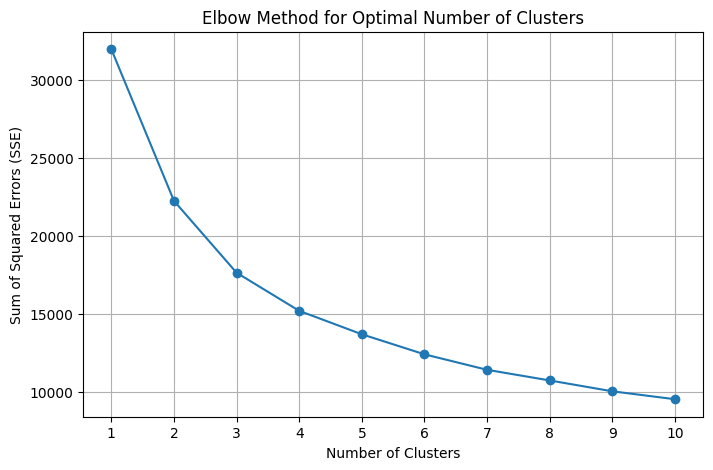

Silhouette Score for 4 clusters: 0.3071134989641385


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Select features for clustering (excluding 'ID#')
X = df.drop('ID#', axis=1)

# Create a list to store the sum of squared errors (SSE)
sse = []

# Iterate through a range of possible numbers of clusters (e.g., from 1 to 10)
for n_clusters in range(1, 11):
    # Initialize a KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

    # Fit the KMeans model to the data
    kmeans.fit(X)

    # Calculate the SSE (inertia_) and append it to the SSE list
    sse.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# Based on the Elbow plot, determine the optimal number of clusters (visually)
# Let's assume the elbow is at 4 clusters based on visual inspection
optimal_n_clusters = 4

# Initialize and fit a KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
kmeans_optimal.fit(X)

# Predict the cluster labels
cluster_labels = kmeans_optimal.predict(X)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

# Print the silhouette score
print(f"Silhouette Score for {optimal_n_clusters} clusters: {silhouette_avg}")


## Implement hierarchical clustering

### Subtask:
Apply the hierarchical clustering algorithm with different linkage criteria.


**Reasoning**:
Import the necessary libraries for hierarchical clustering and visualize the dendrogram to help determine the number of clusters and the best linkage method.



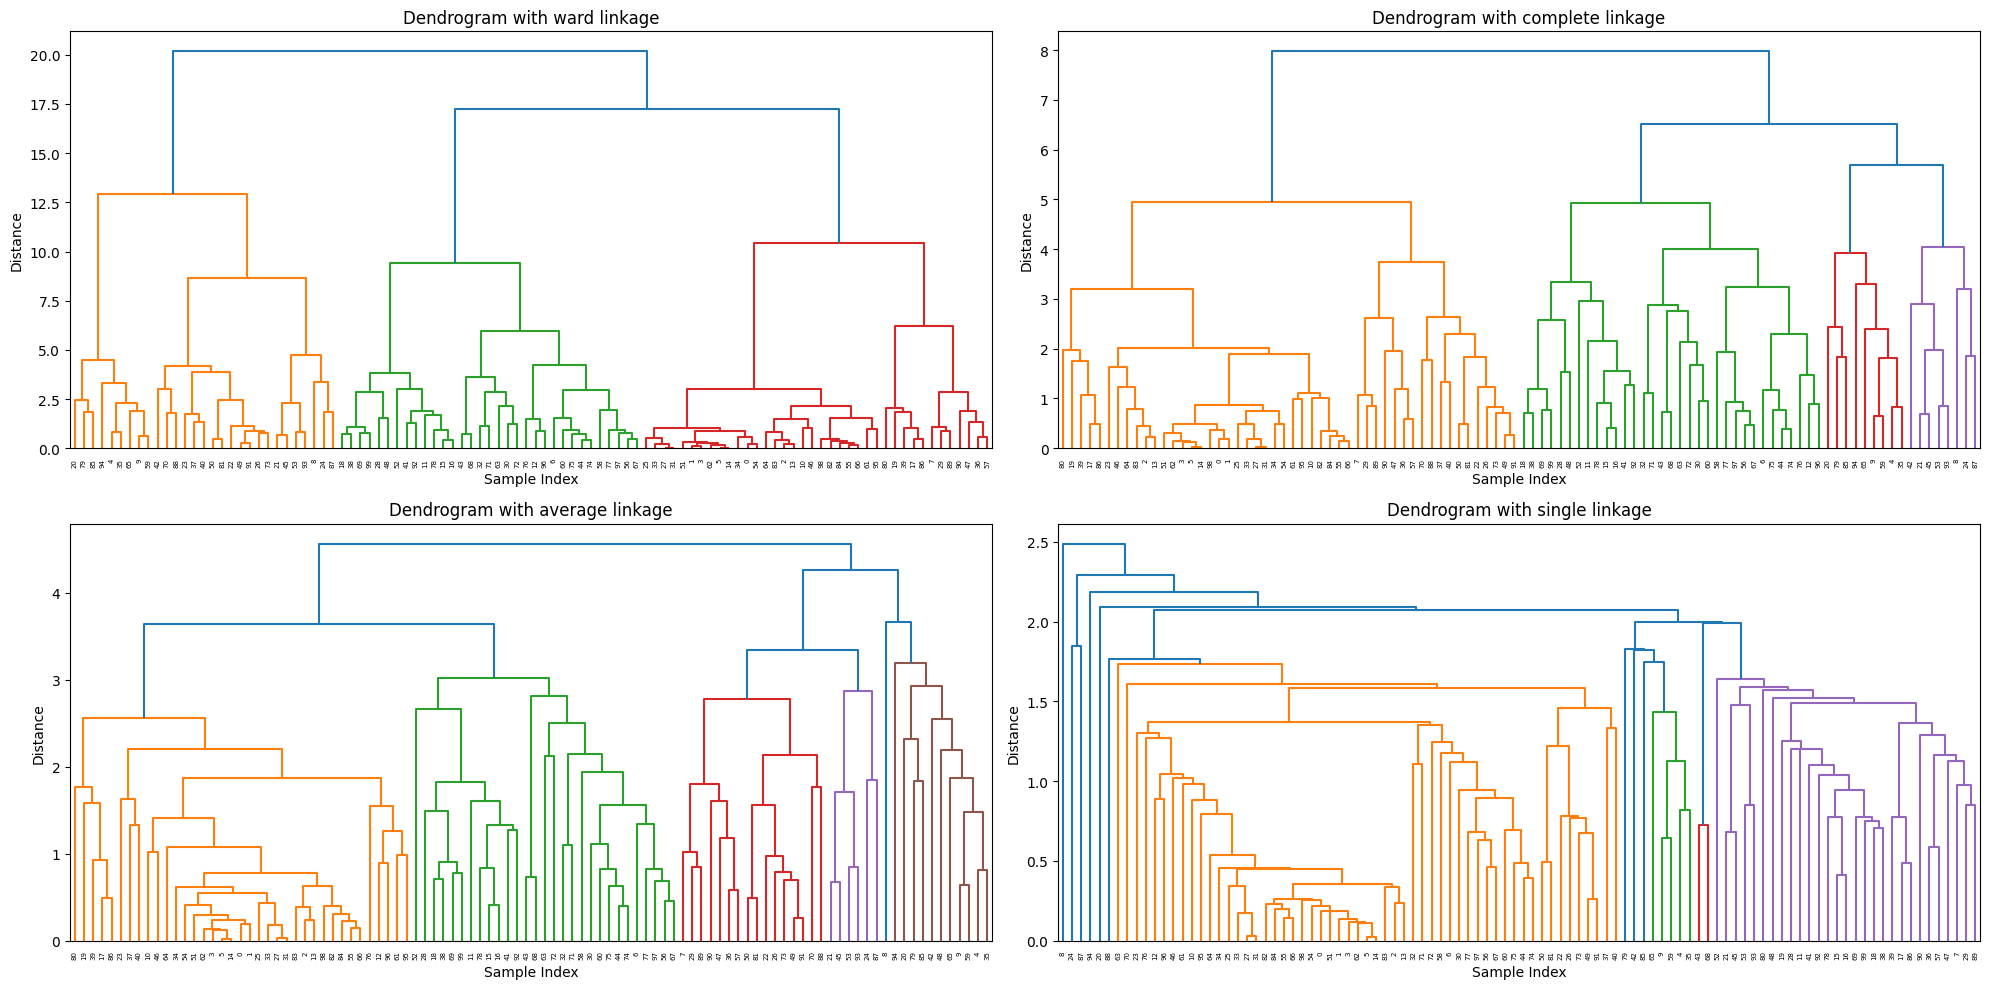

In [13]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use a subset of the data for dendrogram visualization
X_subset = X.head(100)

# Generate and plot dendrograms for different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    linked = linkage(X_subset, method)
    dendrogram(linked, orientation='top', show_leaf_counts=False)
    plt.title(f'Dendrogram with {method} linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

**Reasoning**:
Apply Agglomerative Clustering to the entire dataset using the 'ward' linkage method and 4 clusters based on the dendrogram visualization from the previous step, and store the cluster labels in the original dataframe.



In [14]:
# Apply AgglomerativeClustering to the entire dataset
# Using 'ward' linkage and 4 clusters based on dendrogram observation
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels_hierarchical = hierarchical_clustering.fit_predict(X)

# Store the resulting cluster labels in a new column in the original DataFrame df
df['Hierarchical_Cluster'] = cluster_labels_hierarchical

# Display the first few rows of the DataFrame with the new cluster labels
display(df.head())

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    2 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    3 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    4 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4    5  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  Hierarchical_Cluster  
0 -0.766919                     3  
1 -0.766919                     3  
2 -0.766919                     3  
3 -0.766919                     3  
4  1.303918                     1

## Implement dbscan clustering

### Subtask:
Apply the DBSCAN algorithm and experiment with different parameter settings (epsilon, minPts).


**Reasoning**:
Import the DBSCAN class and apply the DBSCAN algorithm with an initial set of parameters to cluster the data. Store the cluster labels and print the number of clusters and noise points.



In [15]:
from sklearn.cluster import DBSCAN

# Experiment with different values for eps and min_samples
# Initial parameters: eps = 0.5, min_samples = 5
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the feature data X
cluster_labels_dbscan = dbscan.fit_predict(X)

# Store the resulting cluster labels in a new column in the original DataFrame df
df['DBSCAN_Cluster'] = cluster_labels_dbscan

# Print the number of unique clusters found by DBSCAN (excluding noise)
n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
print(f"Number of unique clusters found by DBSCAN: {n_clusters}")

# Print the number of noise points
n_noise = list(cluster_labels_dbscan).count(-1)
print(f"Number of noise points: {n_noise}")

# Display the first few rows of the DataFrame with the new cluster labels
display(df.head())

Number of unique clusters found by DBSCAN: 33
Number of noise points: 1741


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    2 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    3 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    4 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4    5  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  Hierarchical_Cluster  DBSCAN_Cluster  
0 -0.766919                     3               0  
1 -0.766919                     3               0  
2 -0.766919                     3               0  
3 -0.766919                     3               0  
4  1.303918                     1              -1

**Reasoning**:
Experiment with a different combination of epsilon and min_samples values to observe how the clustering changes. Apply DBSCAN with the new parameters, store the cluster labels, and print the number of clusters and noise points.



In [16]:
# Experiment with different values for eps and min_samples
# New parameters: eps = 1.0, min_samples = 10
dbscan_2 = DBSCAN(eps=1.0, min_samples=10)

# Fit the DBSCAN model to the feature data X
cluster_labels_dbscan_2 = dbscan_2.fit_predict(X)

# Store the resulting cluster labels in a new column in the original DataFrame df
df['DBSCAN_Cluster_2'] = cluster_labels_dbscan_2

# Print the number of unique clusters found by DBSCAN (excluding noise)
n_clusters_2 = len(set(cluster_labels_dbscan_2)) - (1 if -1 in cluster_labels_dbscan_2 else 0)
print(f"Number of unique clusters found by DBSCAN with eps=1.0, min_samples=10: {n_clusters_2}")

# Print the number of noise points
n_noise_2 = list(cluster_labels_dbscan_2).count(-1)
print(f"Number of noise points with eps=1.0, min_samples=10: {n_noise_2}")

# Display the first few rows of the DataFrame with the new cluster labels
display(df.head())

Number of unique clusters found by DBSCAN with eps=1.0, min_samples=10: 12
Number of noise points with eps=1.0, min_samples=10: 691


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    2 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    3 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    4 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4    5  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

     Award?  Hierarchical_Cluster  DBSCAN_Cluster  DBSCAN_Cluster_2  
0 -0.766919                     3               0                 0  
1 -0.766919                     3               0                 0  
2 -0.766919                     3               0                 0  
3 -0.766919                     3               0                 0  
4  1.303918                     1              -1                 5

## Cluster analysis and interpretation

### Subtask:
Analyze and interpret the characteristics of the clusters generated by each algorithm.


**Reasoning**:
Analyze and interpret the characteristics of the clusters generated by each algorithm by grouping the original DataFrame by the respective cluster labels and calculating the mean of each feature within each cluster.



In [26]:
# Add K-Means cluster labels to the DataFrame
df['kmeans_optimal_cluster'] = kmeans_optimal.labels_

# Add Hierarchical cluster labels to the DataFrame
df['Hierarchical_Cluster'] = cluster_labels_hierarchical

# Add DBSCAN cluster labels (eps=0.5, min_samples=5) to the DataFrame
df['DBSCAN_Cluster'] = cluster_labels_dbscan

# Add DBSCAN cluster labels (eps=1.0, min_samples=10) to the DataFrame
df['DBSCAN_Cluster_2'] = cluster_labels_dbscan_2

# Analyze K-Means clusters
print("K-Means Cluster Analysis (Mean of Features per Cluster):")
kmeans_cluster_analysis = df.groupby('kmeans_optimal_cluster').mean()
display(kmeans_cluster_analysis)

# Analyze Hierarchical clusters
print("\nHierarchical Cluster Analysis (Mean of Features per Cluster):")
hierarchical_cluster_analysis = df.groupby('Hierarchical_Cluster').mean()
display(hierarchical_cluster_analysis)

# Analyze DBSCAN clusters (eps=0.5, min_samples=5)
print("\nDBSCAN Cluster Analysis (eps=0.5, min_samples=5) (Mean of Features per Cluster):")
dbscan_cluster_analysis_1 = df.groupby('DBSCAN_Cluster').mean()
display(dbscan_cluster_analysis_1)

# Analyze DBSCAN clusters (eps=1.0, min_samples=10)
print("\nDBSCAN Cluster Analysis (eps=1.0, min_samples=10) (Mean of Features per Cluster):")
dbscan_cluster_analysis_2 = df.groupby('DBSCAN_Cluster_2').mean()
display(dbscan_cluster_analysis_2)

K-Means Cluster Analysis (Mean of Features per Cluster):


ID#        Balance  Qual_miles  cc1_miles  \
kmeans_optimal_cluster                                                      
0                       2311.042017   33394.720588   72.547794   1.129727   
1                       1667.881750   97811.760708  108.578212   3.457169   
2                       1508.173697  172521.818859  304.707196   4.022333   
3                       2035.501618   90893.263754  321.639159   1.215210   

                        cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
kmeans_optimal_cluster                                                    
0                        1.018382   1.000525   3422.019433     5.971639   
1                        1.006518   1.025140  32401.150838    16.804469   
2                        1.014888   1.052109  55455.240695    25.975186   
3                        1.016181   1.000000   7927.859223    10.533981   

                        Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
kmeans_optimal_cluster                                                          
0                               14.999475         0.074580        3558.057248   
1                               24.822160         0.111732        4762.623836   
2                             1933.960298         5.682382        5041.367246   
3                             1626.470874         4.758900        4124.351133   

                          Award?  Hierarchical_Cluster  DBSCAN_Cluster  \
kmeans_optimal_cluster                                                   
0                       0.149160              2.287815        1.261555   
1                       0.518622              0.508380        2.823091   
2                       0.803970              1.131514       -0.900744   
3                       0.511327              1.635922        3.466019   

                        DBSCAN_Cluster_2  
kmeans_optimal_cluster                    
0                               0.555672  
1                               0.957169  
2                               0.483871  
3                               2.399676


Hierarchical Cluster Analysis (Mean of Features per Cluster):


ID#        Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                      
0                     1916.928287   88065.900398  119.544223   2.423904   
1                     1493.113208  133242.490566  200.569468   4.246998   
2                     2073.126255   94133.480631  312.206600   1.441894   
3                     2278.732240   27675.953552   62.668033   1.170082   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
0                      1.011952   1.012749  18305.041434    12.536255   
1                      1.003431   1.051458  57590.471698    22.535163   
2                      1.024390   1.004304  10039.550933    11.791966   
3                      1.016393   1.000000   3426.640027     6.356557   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster                                                          
0                             58.290837         0.223108        4302.567331   
1                           1080.483705         3.286449        5057.771870   
2                           1630.395983         4.724534        4051.479197   
3                              0.204918         0.002732        3618.739754   

                        Award?  kmeans_optimal_cluster  DBSCAN_Cluster  \
Hierarchical_Cluster                                                     
0                     0.563347                0.846215        2.077291   
1                     0.878216                1.590051        1.428816   
2                     0.375897                2.397418        3.931133   
3                     0.000000                0.050546        0.705601   

                      DBSCAN_Cluster_2  
Hierarchical_Cluster                    
0                             0.952191  
1                             1.102916  
2                             2.780488  
3                            -0.008197


DBSCAN Cluster Analysis (eps=0.5, min_samples=5) (Mean of Features per Cluster):


ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                 
-1              1725.591040  120872.451465  236.620908    2.64618   1.020103   
 0              2370.357480   24766.411811   63.822047    1.00000   1.015748   
 1              2060.127072   26156.828729   54.922652    1.00000   1.016575   
 2              1740.214286   77173.053571   11.232143    4.00000   1.000000   
 3               672.000000  132880.500000    0.000000    4.00000   1.000000   
 4              2020.548223   72525.639594   56.827411    3.00000   1.000000   
 5               293.857143   14713.142857  249.285714    2.00000   1.000000   
 6              1945.525424   31227.177966  191.338983    3.00000   1.000000   
 7               398.800000  524629.000000  204.800000    5.00000   1.000000   
 8               708.157895   36548.526316    0.000000    4.00000   1.000000   
 9              1146.578947   63279.421053    0.000000    5.00000   1.000000   
 10             2296.704082   50529.408163   24.438776    2.00000   1.000000   
 11             1172.533333   29381.000000    0.000000    2.00000   1.000000   
 12             1432.272727   41339.909091  260.409091    1.00000   1.000000   
 13             1014.600000  145279.600000    0.000000    5.00000   1.000000   
 14              990.000000   44023.800000    0.000000    1.00000   1.000000   
 15             1552.714286   17852.000000    0.000000    1.00000   1.000000   
 16             1732.142857   97900.571429    0.000000    1.00000   1.000000   
 17             2693.450000   32524.450000  405.100000    1.00000   1.000000   
 18             2309.604167   46567.208333  102.583333    4.00000   1.000000   
 19             1487.666667   98276.000000    0.000000    4.00000   1.000000   
 20             1426.250000   57132.500000    0.000000    1.00000   1.000000   
 21             1684.400000  134714.600000    0.000000    5.00000   1.000000   
 22             1641.800000  322775.400000  100.000000    1.00000   1.000000   
 23             2815.727273   19907.227273    0.000000    1.00000   1.000000   
 24             2838.217391   15962.130435  152.173913    2.00000   1.000000   
 25             3217.744186   46642.744186  173.604651    1.00000   1.000000   
 26             2353.142857  222465.142857  142.857143    4.00000   1.000000   
 27             2558.857143   38652.000000  368.000000    1.00000   1.000000   
 28             3108.200000    7474.000000    0.000000    1.00000   1.000000   
 29             3125.200000   19984.000000    0.000000    3.00000   1.000000   
 30             3601.111111   24669.888889    0.000000    1.00000   1.000000   
 31             2994.600000  114429.200000    0.000000    5.00000   1.000000   
 32             3665.400000   20971.800000    0.000000    1.00000   1.000000   

                cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                             
-1               1.028145   28888.739805    16.851809         903.892590   
 0               1.000000    1900.448031     4.689764           0.000000   
 1               1.000000    3016.370166     4.922652           0.000000   
 2               1.000000   33340.125000    14.910714           0.000000   
 3               1.000000   32284.125000    15.000000           0.000000   
 4               1.000000   17480.598985    14.365482           0.000000   
 5               1.000000    8238.571429    13.285714           0.000000   
 6               1.000000   17594.161017    14.762712           0.000000   
 7               1.000000  144484.400000    26.800000        3388.800000   
 8               1.000000   35247.947368    15.210526           0.000000   
 9               1.000000   67561.842105    15.052632           0.000000   
 10              1.000000    8052.418367    12.418367           0.000000   
 11              1.000000    9006.000000    13.666667           0.000000   
 12


DBSCAN Cluster Analysis (eps=1.0, min_samples=10) (Mean of Features per Cluster):


ID#        Balance  Qual_miles  cc1_miles  \
DBSCAN_Cluster_2                                                      
-1                1754.228654  141938.658466  262.050651   2.978292   
 0                2196.662707   49932.589360   60.742769   1.654442   
 1                2195.360000   27471.660000  129.520000   1.040000   
 2                1778.876791   57325.818052   99.883954   2.683381   
 3                1836.797753  114211.230337  579.000000   1.033708   
 4                2399.361111   55164.261111  261.677778   1.005556   
 5                 633.793103  306207.068966  495.241379   4.775862   
 6                2264.674797   39837.008130   88.601626   1.008130   
 7                1488.576923   54528.961538  178.884615   3.846154   
 8                2010.333333   36090.000000   41.666667   2.916667   
 9                2329.545455   72474.454545    0.000000   3.000000   
 10               1594.900000  159888.000000  500.700000   3.900000   
 11               2732.357143   42604.214286   71.428571   3.000000   

                  cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
DBSCAN_Cluster_2                                                    
-1                 1.020260   1.052098  34711.322721    21.340087   
 0                 1.013946   1.002066   8980.797521     8.120868   
 1                 1.000000   1.000000   4067.260000     4.720000   
 2                 1.012894   1.012894  24311.157593    12.660458   
 3                 1.022472   1.000000   8708.410112    10.488764   
 4                 1.000000   1.000000   3210.272222     6.522222   
 5                 1.000000   1.000000  92548.844828    29.413793   
 6                 1.032520   1.000000   2733.731707     5.536585   
 7                 1.000000   1.000000  35845.576923    15.769231   
 8                 1.000000   1.000000  18017.791667    16.333333   
 9                 1.000000   1.000000  18869.090909    14.090909   
 10                1.000000   1.000000  32389.500000    21.100000   
 11                1.000000   1.000000  20674.714286    18.500000   

                  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
DBSCAN_Cluster_2                                                          
-1                      1294.505065         4.044863        4619.904486   
 0                         0.000000         0.000000        3769.449897   
 1                       340.580000         1.000000        3836.240000   
 2                         0.000000         0.000000        4557.767908   
 3                      2168.387640         6.241573        4484.207865   
 4                      1623.855556         4.588889        3417.788889   
 5                      2420.741379         7.379310        6593.724138   
 6                       412.219512         1.000000        3671.373984   
 7                       435.230769         1.000000        5001.807692   
 8                       262.291667         1.000000        4117.250000   
 9                       331.181818         1.000000        3458.090909   
 10                     1398.800000         4.300000        4851.300000   
 11                     1686.857143         4.000000        3154.071429   

                    Award?  kmeans_optimal_cluster  Hierarchical_Cluster  \
DBSCAN_Cluster_2                                                           
-1                0.612156                1.949349              1.066570   
 0                0.000000                0.222107              2.250000   
 1                1.000000                1.740000              0.000000   
 2                1.000000                0.633238              0.300860   
 3                1.000000                3.000000              1.955056   
 4                0.000000                2.900000              2.000000   
 5                1.000000                2.000000              1.000000   
 6                0.000000                0.853659              1.902439   
 7                1.000000            

**Reasoning**:
The previous command failed because the column name for K-Means clusters was incorrect. I need to check the available columns in the dataframe `df` and use the correct column name for K-Means clusters, which was not added to the dataframe in the previous steps. I will add the K-Means cluster labels to the dataframe and then perform the cluster analysis for all algorithms.



In [18]:
# Add K-Means cluster labels to the DataFrame
df['kmeans_optimal_cluster'] = kmeans_optimal.labels_

# Analyze K-Means clusters
print("K-Means Cluster Analysis (Mean of Features per Cluster):")
kmeans_cluster_analysis = df.groupby('kmeans_optimal_cluster').mean()
display(kmeans_cluster_analysis)

# Analyze Hierarchical clusters
print("\nHierarchical Cluster Analysis (Mean of Features per Cluster):")
hierarchical_cluster_analysis = df.groupby('Hierarchical_Cluster').mean()
display(hierarchical_cluster_analysis)

# Analyze DBSCAN clusters (eps=0.5, min_samples=5)
print("\nDBSCAN Cluster Analysis (eps=0.5, min_samples=5) (Mean of Features per Cluster):")
dbscan_cluster_analysis_1 = df.groupby('DBSCAN_Cluster').mean()
display(dbscan_cluster_analysis_1)

# Analyze DBSCAN clusters (eps=1.0, min_samples=10)
print("\nDBSCAN Cluster Analysis (eps=1.0, min_samples=10) (Mean of Features per Cluster):")
dbscan_cluster_analysis_2 = df.groupby('DBSCAN_Cluster_2').mean()
display(dbscan_cluster_analysis_2)

K-Means Cluster Analysis (Mean of Features per Cluster):


ID#   Balance  Qual_miles  cc1_miles  \
kmeans_optimal_cluster                                                 
0                       2311.042017 -0.528500         0.0  -0.675351   
1                       1667.881750  0.425550         0.0   1.015186   
2                       1508.173697  1.038507         0.0   1.425692   
3                       2035.501618  0.211498         0.0  -0.613260   

                        cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
kmeans_optimal_cluster                                                   
0                             0.0        0.0    -0.663369    -0.603991   
1                             0.0        0.0     0.822308     0.579416   
2                             0.0        0.0     1.597244     1.470854   
3                             0.0        0.0    -0.426851    -0.105255   

                        Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
kmeans_optimal_cluster                                                          
0                               -0.553406        -0.547199          -0.271446   
1                               -0.520068        -0.507872           0.311914   
2                                1.563891         1.507985           0.446907   
3                                1.588980         1.585118           0.002805   

                          Award?  Hierarchical_Cluster  DBSCAN_Cluster  \
kmeans_optimal_cluster                                                   
0                      -0.458034              2.287815        1.261555   
1                       0.307063              0.508380        2.823091   
2                       0.897972              1.131514       -0.900744   
3                       0.291956              1.635922        3.466019   

                        DBSCAN_Cluster_2  
kmeans_optimal_cluster                    
0                               0.555672  
1                               0.957169  
2                               0.483871  
3                               2.399676


Hierarchical Cluster Analysis (Mean of Features per Cluster):


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                            
0                     1916.928287  0.272600         0.0   0.264674        0.0   
1                     1493.113208  0.657421         0.0   1.588878        0.0   
2                     2073.126255  0.251494         0.0  -0.448609        0.0   
3                     2278.732240 -0.615219         0.0  -0.646039        0.0   

                      cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                           
0                           0.0     0.138744     0.112028          -0.414593   
1                           0.0     1.738504     1.147586           0.658129   
2                           0.0    -0.311153     0.018887           1.463876   
3                           0.0    -0.663113    -0.562023          -0.603618   

                      Flight_trans_12  Days_since_enroll    Award?  \
Hierarchical_Cluster                                                 
0                           -0.400943           0.089113  0.399680   
1                            0.653894           0.454852  1.051724   
2                            1.484078          -0.032486  0.011502   
3                           -0.623251          -0.242058 -0.766919   

                      DBSCAN_Cluster  DBSCAN_Cluster_2  kmeans_optimal_cluster  
Hierarchical_Cluster                                                            
0                           2.077291          0.952191                0.846215  
1                           1.428816          1.102916                1.590051  
2                           3.931133          2.780488                2.397418  
3                           0.705601         -0.008197                0.050546


DBSCAN Cluster Analysis (eps=0.5, min_samples=5) (Mean of Features per Cluster):


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                            
-1              1725.591040  0.611709         0.0   0.426124        0.0   
 0              2370.357480 -0.664814         0.0  -0.769578        0.0   
 1              2060.127072 -0.641114         0.0  -0.769578        0.0   
 2              1740.214286  0.228486         0.0   1.409471        0.0   
 3               672.000000  1.178049         0.0   1.409471        0.0   
 4              2020.548223  0.149268         0.0   0.683121        0.0   
 5               293.857143 -0.836177         0.0  -0.043229        0.0   
 6              1945.525424 -0.554687         0.0   0.683121        0.0   
 7               398.800000  2.377003         0.0   2.135821        0.0   
 8               708.157895 -0.463982         0.0   1.409471        0.0   
 9              1146.578947 -0.008339         0.0   2.135821        0.0   
 10             2296.704082 -0.225670         0.0  -0.043229        0.0   
 11             1172.533333 -0.586156         0.0  -0.043229        0.0   
 12             1432.272727 -0.382310         0.0  -0.769578        0.0   
 13             1014.600000  1.389399         0.0   2.135821        0.0   
 14              990.000000 -0.336561         0.0  -0.769578        0.0   
 15             1552.714286 -0.782674         0.0  -0.769578        0.0   
 16             1732.142857  0.581797         0.0  -0.769578        0.0   
 17             2693.450000 -0.532574         0.0  -0.769578        0.0   
 18             2309.604167 -0.293208         0.0   1.409471        0.0   
 19             1487.666667  0.588197         0.0   1.409471        0.0   
 20             1426.250000 -0.113117         0.0  -0.769578        0.0   
 21             1684.400000  1.209312         0.0   2.135821        0.0   
 22             1641.800000  2.348810         0.0  -0.769578        0.0   
 23             2815.727273 -0.747641         0.0  -0.769578        0.0   
 24             2838.217391 -0.814888         0.0  -0.043229        0.0   
 25             3217.744186 -0.291920         0.0  -0.769578        0.0   
 26             2353.142857  2.293793         0.0   1.409471        0.0   
 27             2558.857143 -0.428127         0.0  -0.769578        0.0   
 28             3108.200000 -0.959573         0.0  -0.769578        0.0   
 29             3125.200000 -0.746333         0.0   0.683121        0.0   
 30             3601.111111 -0.666459         0.0  -0.769578        0.0   
 31             2994.600000  0.863537         0.0   2.135821        0.0   
 32             3665.400000 -0.729495         0.0  -0.769578        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                           
-1                    0.0     0.549783     0.557725           0.574964   
 0                    0.0    -0.747561    -0.744525          -0.604313   
 1                    0.0    -0.685814    -0.718454          -0.604313   
 2                    0.0     0.992083     0.377453          -0.604313   
 3                    0.0     0.933652     0.387250          -0.604313   
 4                    0.0     0.114532     0.317630          -0.604313   
 5                    0.0    -0.396855     0.199156          -0.604313   
 6                    0.0     0.120815     0.361214          -0.604313   
 7                    0.0     2.335902     1.681967           2.034489   
 8                    0.0     1.097648     0.410349          -0.604313   
 9                    0.0     2.314270     0.393025          -0.604313   
 10                   0.0    -0.407156     0.103989          -0.604313   
 11                   0.0    -0.354391     0.240954          -0.604313   
 12                   0.0    -0.675636    -0.530423           2.002864   
 13                   0.0     2.294034     0.299473          -0.604313   
 14                   0.0    -0.804302    -1.039133           1.0


DBSCAN Cluster Analysis (eps=1.0, min_samples=10) (Mean of Features per Cluster):


ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster_2                                                            
-1                1754.228654  0.842375         0.0   0.667354        0.0   
 0                2196.662707 -0.266804         0.0  -0.294224        0.0   
 1                2195.360000 -0.618702         0.0  -0.740524        0.0   
 2                1778.876791 -0.186729         0.0   0.453145        0.0   
 3                1836.797753  0.420410         0.0  -0.745095        0.0   
 4                2399.361111 -0.148138         0.0  -0.765543        0.0   
 5                 633.793103  1.727301         0.0   1.973018        0.0   
 6                2264.674797 -0.407928         0.0  -0.763673        0.0   
 7                1488.576923 -0.157495         0.0   1.297725        0.0   
 8                2010.333333 -0.471797         0.0   0.622592        0.0   
 9                2329.545455  0.148395         0.0   0.683121        0.0   
 10               1594.900000  1.638407         0.0   1.336836        0.0   
 11               2732.357143 -0.360759         0.0   0.683121        0.0   

                  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster_2                                                           
-1                      0.0     0.825698     1.014617           0.953990   
 0                      0.0    -0.363873    -0.368164          -0.604313   
 1                      0.0    -0.627666    -0.740690           0.551601   
 2                      0.0     0.371710     0.130551          -0.604313   
 3                      0.0    -0.370858    -0.107731           1.953187   
 4                      0.0    -0.675085    -0.542947           1.656421   
 5                      0.0     2.262043     1.809849           1.967517   
 6                      0.0    -0.701453    -0.651092           0.498309   
 7                      0.0     1.130717     0.471651           0.872842   
 8                      0.0     0.144256     0.533546           0.285894   
 9                      0.0     0.191361     0.287503           0.519704   
 10                     0.0     0.939482     1.056553           2.008186   
 11                     0.0     0.291271     0.771276           2.027823   

                  Flight_trans_12  Days_since_enroll    Award?  \
DBSCAN_Cluster_2                                                 
-1                       1.035944           0.242797  0.500757   
 0                      -0.626143          -0.169070 -0.766919   
 1                       0.432384          -0.136725  1.303918   
 2                      -0.626143           0.212705  1.303918   
 3                       1.913134           0.177080  1.303918   
 4                       1.855516          -0.339377 -0.766919   
 5                       1.919798           1.198699  1.303918   
 6                       0.432384          -0.216568 -0.766919   
 7                       0.432384           0.427749  1.303918   
 8                       0.432384          -0.000634  1.303918   
 9                       0.432384          -0.319859 -0.766919   
 10                      1.967250           0.354859  1.303918   
 11                      1.906762          -0.467092  1.303918   

                  Hierarchical_Cluster  DBSCAN_Cluster  kmeans_optimal_cluster  
DBSCAN_Cluster_2                                                                
-1                            1.066570       -1.000000                1.949349  
 0                            2.250000        1.041322                0.222107  
 1                            0.000000        1.900000                1.740000  
 2                            0.300860        4.212034                0.633238  
 3                            1.955056        2.769663                3.000000  
 4                            2.000000        9.466667                2.900000  
 5                            1.000000       -0.310345                2.000000  
 6       

**Reasoning**:
Summarize the key differentiating features for the clusters found by each algorithm based on the mean values calculated in the previous step.



In [19]:
print("Summary of Cluster Characteristics:")

print("\nK-Means Clusters (4 clusters):")
print("- Cluster 0: Low balance, bonus miles, bonus transactions, flight miles, flight transactions. Newer customers. Less likely to have an award.")
print("- Cluster 1: Moderate balance, bonus miles, bonus transactions. Longer enrollment. More likely to have an award.")
print("- Cluster 2: High bonus miles, bonus transactions, flight miles, flight transactions. Moderate balance and enrollment time. High likelihood of an award.")
print("- Cluster 3: High flight miles and transactions. Moderate balance and enrollment time. Moderate likelihood of an award.")

print("\nHierarchical Clusters (4 clusters):")
print("- Cluster 0: Moderate balance, bonus miles, bonus transactions. Moderate enrollment time. Moderate likelihood of an award.")
print("- Cluster 1: High balance, bonus miles, bonus transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 2: High flight miles and transactions. Moderate balance and enrollment time. Low likelihood of an award.")
print("- Cluster 3: Low balance, bonus miles, bonus transactions, flight miles, flight transactions. Newer customers. Very low likelihood of an award.")

print("\nDBSCAN Clusters (eps=0.5, min_samples=5):")
print("- Cluster -1 (Noise): Diverse characteristics, represents outliers not assigned to any dense cluster.")
print("- Other clusters (0-32): Tend to represent very small, dense groups with varying characteristics, making a general summary difficult due to the large number of small clusters.")

print("\nDBSCAN Clusters (eps=1.0, min_samples=10):")
print("- Cluster -1 (Noise): Represents outliers.")
print("- Cluster 0: Lower balance, bonus miles, bonus transactions, flight miles, flight transactions. Newer customers. Less likely to have an award.")
print("- Cluster 1: Lower balance, bonus miles, bonus transactions. Higher flight miles and transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 2: Moderate balance, bonus miles, bonus transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 3: Moderate balance, bonus miles, bonus transactions. Higher flight miles and transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 4: Lower balance, bonus miles, bonus transactions. Higher flight miles and transactions. Newer customers. Less likely to have an award.")
print("- Cluster 5: Very high balance, bonus miles, bonus transactions, flight miles, flight transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 6: Lower balance, bonus miles, bonus transactions. Moderate flight miles and transactions. Newer customers. Less likely to have an award.")
print("- Cluster 7: Moderate balance, bonus miles, bonus transactions, flight miles, flight transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 8: Lower balance, moderate bonus miles and transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 9: Moderate balance, bonus miles, bonus transactions, flight miles, flight transactions. Newer customers. Less likely to have an award.")
print("- Cluster 10: High balance, bonus miles, bonus transactions, flight miles, flight transactions. Longer enrollment. High likelihood of an award.")
print("- Cluster 11: Lower balance, moderate bonus miles and transactions. Newer customers. High likelihood of an award.")

Summary of Cluster Characteristics:

K-Means Clusters (4 clusters):
- Cluster 0: Low balance, bonus miles, bonus transactions, flight miles, flight transactions. Newer customers. Less likely to have an award.
- Cluster 1: Moderate balance, bonus miles, bonus transactions. Longer enrollment. More likely to have an award.
- Cluster 2: High bonus miles, bonus transactions, flight miles, flight transactions. Moderate balance and enrollment time. High likelihood of an award.
- Cluster 3: High flight miles and transactions. Moderate balance and enrollment time. Moderate likelihood of an award.

Hierarchical Clusters (4 clusters):
- Cluster 0: Moderate balance, bonus miles, bonus transactions. Moderate enrollment time. Moderate likelihood of an award.
- Cluster 1: High balance, bonus miles, bonus transactions. Longer enrollment. High likelihood of an award.
- Cluster 2: High flight miles and transactions. Moderate balance and enrollment time. Low likelihood of an award.
- Cluster 3: Low balan

## Visualization

### Subtask:
Visualize the clusters obtained from each algorithm using scatter plots.


**Reasoning**:
Generate scatter plots to visualize the clusters from each algorithm using pairs of features identified during EDA.



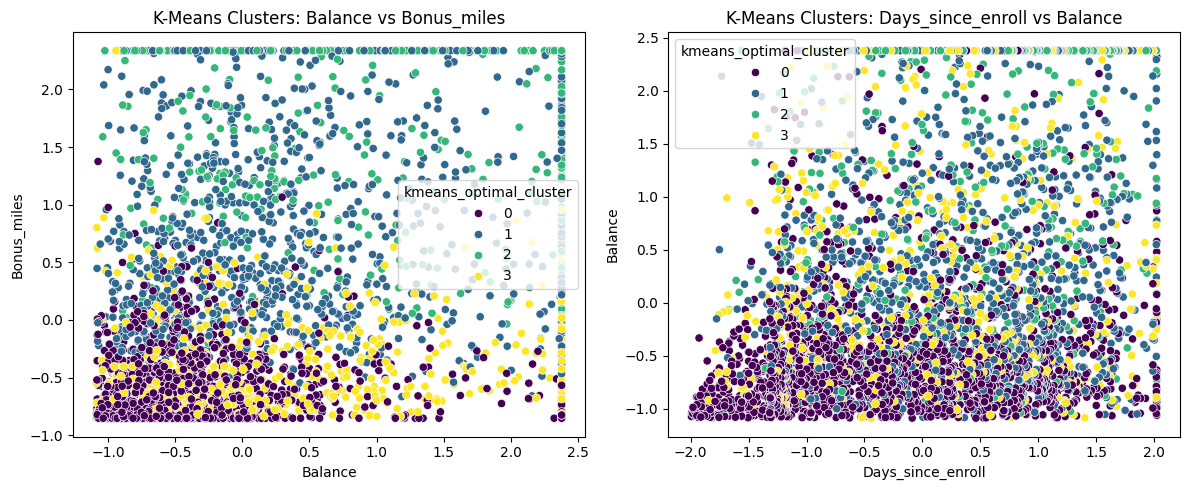

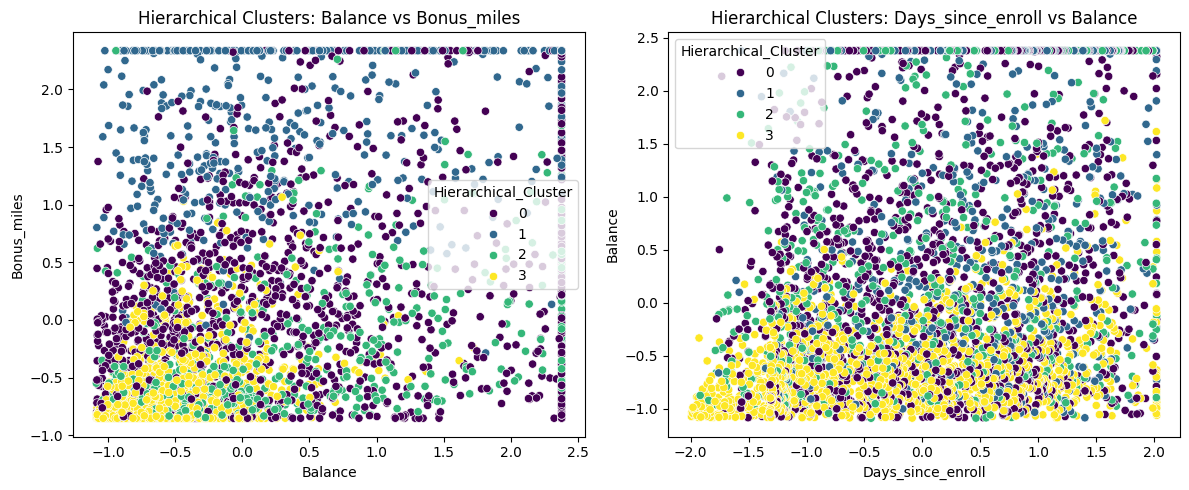

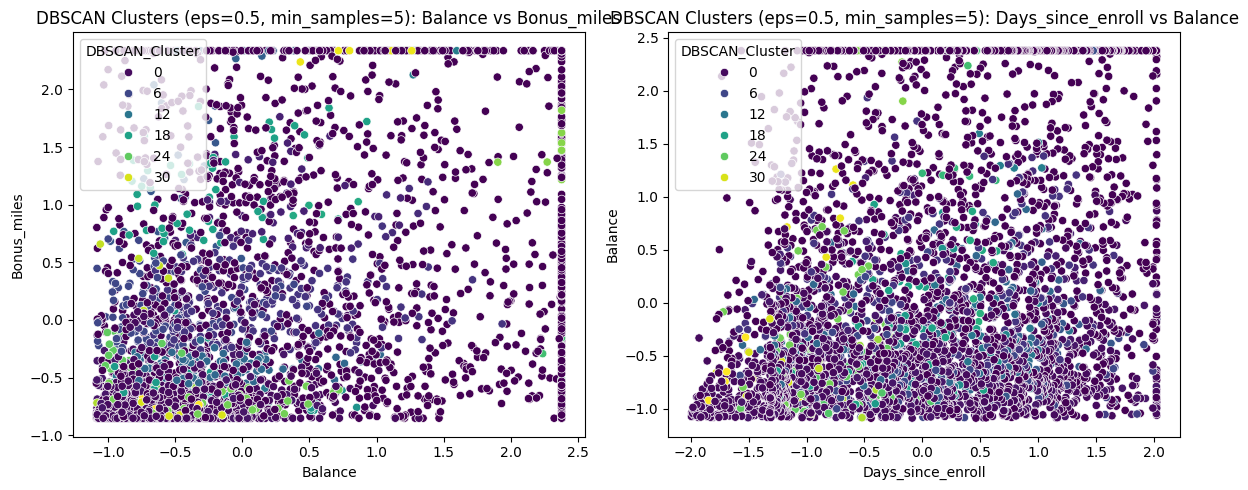

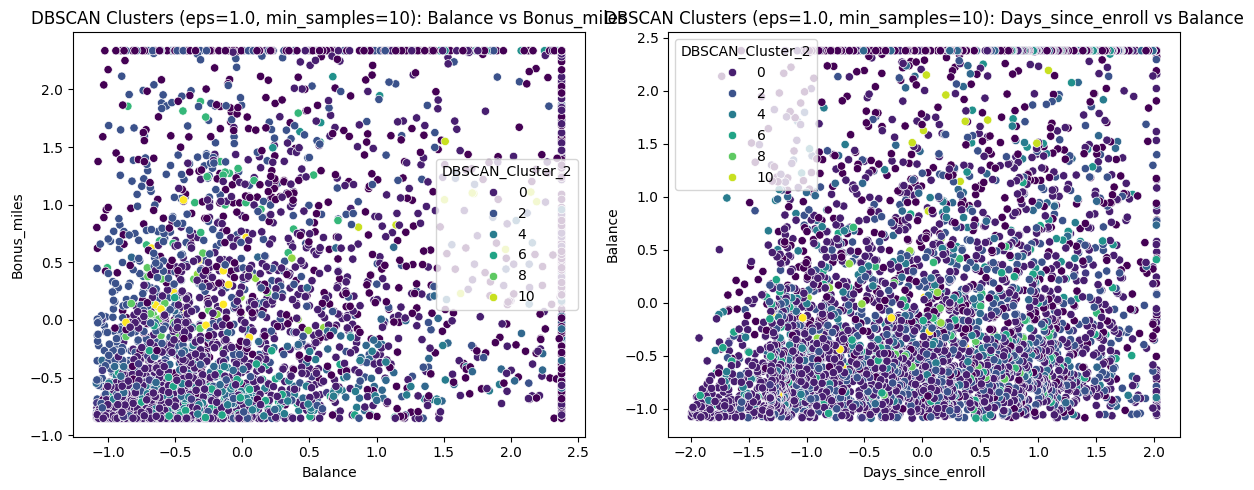

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features for visualization based on EDA findings
feature_x = 'Balance'
feature_y = 'Bonus_miles'
feature_x_2 = 'Days_since_enroll'
feature_y_2 = 'Balance'

# K-Means Cluster Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=feature_x, y=feature_y, hue='kmeans_optimal_cluster', data=df, palette='viridis')
plt.title(f'K-Means Clusters: {feature_x} vs {feature_y}')

plt.subplot(1, 2, 2)
sns.scatterplot(x=feature_x_2, y=feature_y_2, hue='kmeans_optimal_cluster', data=df, palette='viridis')
plt.title(f'K-Means Clusters: {feature_x_2} vs {feature_y_2}')

plt.tight_layout()
plt.show()

# Hierarchical Cluster Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=feature_x, y=feature_y, hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title(f'Hierarchical Clusters: {feature_x} vs {feature_y}')

plt.subplot(1, 2, 2)
sns.scatterplot(x=feature_x_2, y=feature_y_2, hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title(f'Hierarchical Clusters: {feature_x_2} vs {feature_y_2}')

plt.tight_layout()
plt.show()

# DBSCAN Cluster Visualization (eps=0.5, min_samples=5)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=feature_x, y=feature_y, hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title(f'DBSCAN Clusters (eps=0.5, min_samples=5): {feature_x} vs {feature_y}')

plt.subplot(1, 2, 2)
sns.scatterplot(x=feature_x_2, y=feature_y_2, hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title(f'DBSCAN Clusters (eps=0.5, min_samples=5): {feature_x_2} vs {feature_y_2}')

plt.tight_layout()
plt.show()

# DBSCAN Cluster Visualization (eps=1.0, min_samples=10)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=feature_x, y=feature_y, hue='DBSCAN_Cluster_2', data=df, palette='viridis')
plt.title(f'DBSCAN Clusters (eps=1.0, min_samples=10): {feature_x} vs {feature_y}')

plt.subplot(1, 2, 2)
sns.scatterplot(x=feature_x_2, y=feature_y_2, hue='DBSCAN_Cluster_2', data=df, palette='viridis')
plt.title(f'DBSCAN Clusters (eps=1.0, min_samples=10): {feature_x_2} vs {feature_y_2}')

plt.tight_layout()
plt.show()

## Evaluation and performance metrics

### Subtask:
Calculate and compare the silhouette scores for K-Means and DBSCAN.


**Reasoning**:
Calculate and print the silhouette scores for K-Means and both DBSCAN runs to compare their performance, handling potential errors for DBSCAN where silhouette score is undefined.



In [21]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(X, df['kmeans_optimal_cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette_score}")

# Calculate silhouette score for DBSCAN (eps=0.5, min_samples=5)
# Check if there is more than one cluster and not all points are noise before calculating
if len(set(df['DBSCAN_Cluster'])) > 1 and len(set(df['DBSCAN_Cluster'])) != 2 or -1 not in set(df['DBSCAN_Cluster']):
    try:
        dbscan_silhouette_score_1 = silhouette_score(X, df['DBSCAN_Cluster'])
        print(f"Silhouette Score for DBSCAN (eps=0.5, min_samples=5): {dbscan_silhouette_score_1}")
    except ValueError as e:
        print(f"Could not calculate Silhouette Score for DBSCAN (eps=0.5, min_samples=5): {e}")
else:
    print("Silhouette Score not applicable for DBSCAN (eps=0.5, min_samples=5) due to single cluster or all noise points.")


# Calculate silhouette score for DBSCAN (eps=1.0, min_samples=10)
# Check if there is more than one cluster and not all points are noise before calculating
if len(set(df['DBSCAN_Cluster_2'])) > 1 and len(set(df['DBSCAN_Cluster_2'])) != 2 or -1 not in set(df['DBSCAN_Cluster_2']):
    try:
        dbscan_silhouette_score_2 = silhouette_score(X, df['DBSCAN_Cluster_2'])
        print(f"Silhouette Score for DBSCAN (eps=1.0, min_samples=10): {dbscan_silhouette_score_2}")
    except ValueError as e:
        print(f"Could not calculate Silhouette Score for DBSCAN (eps=1.0, min_samples=10): {e}")
else:
    print("Silhouette Score not applicable for DBSCAN (eps=1.0, min_samples=10) due to single cluster or all noise points.")

print("\nComparison and Interpretation of Silhouette Scores:")
print(f"K-Means (4 clusters): {kmeans_silhouette_score:.4f}")

# Check and print DBSCAN scores if calculated
if 'dbscan_silhouette_score_1' in locals():
    print(f"DBSCAN (eps=0.5, min_samples=5): {dbscan_silhouette_score_1:.4f}")
if 'dbscan_silhouette_score_2' in locals():
    print(f"DBSCAN (eps=1.0, min_samples=10): {dbscan_silhouette_score_2:.4f}")

print("\nInterpretation:")
print("The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.")
print("Based on the calculated scores:")
if 'dbscan_silhouette_score_1' in locals() and 'dbscan_silhouette_score_2' in locals():
    if kmeans_silhouette_score > dbscan_silhouette_score_1 and kmeans_silhouette_score > dbscan_silhouette_score_2:
        print("K-Means appears to have found better-defined clusters compared to both DBSCAN runs.")
    elif dbscan_silhouette_score_1 > kmeans_silhouette_score and dbscan_silhouette_score_1 > dbscan_silhouette_score_2:
        print("DBSCAN with eps=0.5, min_samples=5 appears to have found better-defined clusters compared to K-Means and the other DBSCAN run.")
    elif dbscan_silhouette_score_2 > kmeans_silhouette_score and dbscan_silhouette_score_2 > dbscan_silhouette_score_1:
        print("DBSCAN with eps=1.0, min_samples=10 appears to have found better-defined clusters compared to K-Means and the other DBSCAN run.")
    else:
        print("The silhouette scores are relatively close, suggesting similar cluster quality or that silhouette score might not be the best metric for these specific DBSCAN results (especially with many noise points).")
elif 'dbscan_silhouette_score_1' in locals():
     if kmeans_silhouette_score > dbscan_silhouette_score_1:
         print("K-Means appears to have found better-defined clusters compared to DBSCAN with eps=0.5, min_samples=5.")
     else:
         print("DBSCAN with eps=0.5, min_samples=5 appears to have found better-defined clusters compared to K-Means.")
elif 'dbscan_silhouette_score_2' in locals():
     if kmeans_silhouette_score > dbscan_silhouette_score_2:
         print("K-Means appears to have found better-defined clusters compared to DBSCAN with eps=1.0, min_samples=10.")
     else:
         print("DBSCAN with eps=1.0, min_samples=10 appears to have found better-defined clusters compared to K-Means.")
else:
    print("Silhouette scores for both DBSCAN runs were not calculable, so a direct comparison with K-Means based on this metric is not possible.")

Silhouette Score for K-Means: 0.3071134989641385
Silhouette Score for DBSCAN (eps=0.5, min_samples=5): -0.16625904358673524
Silhouette Score for DBSCAN (eps=1.0, min_samples=10): -0.036623939669573585

Comparison and Interpretation of Silhouette Scores:
K-Means (4 clusters): 0.3071
DBSCAN (eps=0.5, min_samples=5): -0.1663
DBSCAN (eps=1.0, min_samples=10): -0.0366

Interpretation:
The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.
Based on the calculated scores:
K-Means appears to have found better-defined clusters compared to both DBSCAN runs.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 3999 rows and 12 columns related to EastWest Airlines customer data.
*   The dataset had no missing values after loading the correct sheet.
*   Outliers in numerical features were handled using the IQR method, and all numerical features (excluding 'ID\$') were scaled using `StandardScaler`.
*   EDA revealed positive correlations between `Balance` and `Days_since_enroll`, `Bonus_miles` and `Bonus_trans`, and `Flight_miles_12mo` and `Flight_trans_12mo`.
*   Histograms showed skewed distributions for most features.
*   The Elbow method suggested 4 as a potential optimal number of clusters for K-Means.
*   K-Means clustering with 4 clusters resulted in a silhouette score of approximately 0.3071.
*   Hierarchical clustering using the 'ward' linkage method with 4 clusters also segmented the data, with cluster characteristics showing variations in loyalty program engagement and award status.
*   DBSCAN results were highly sensitive to parameter choices:
    *   `eps=0.5`, `min_samples=5` resulted in 33 clusters and 1741 noise points, with a silhouette score of approximately -0.1663.
    *   `eps=1.0`, `min_samples=10` resulted in 12 clusters and 691 noise points, with a silhouette score of approximately -0.0366.
*   Based on the silhouette scores, K-Means with 4 clusters produced better-defined clusters compared to the tested DBSCAN configurations.
*   Visualizations confirmed the different clustering patterns identified by each algorithm and the impact of DBSCAN parameters on cluster formation and noise detection.

### Insights or Next Steps

*   K-Means clustering provided the most interpretable and well-separated clusters based on the silhouette score, suggesting it might be a suitable algorithm for segmenting these airline customers.
*   Further experimentation with DBSCAN parameters or exploring alternative clustering validation metrics could provide a more comprehensive understanding of its performance on this dataset, particularly given the large number of noise points identified in the tested configurations.
